In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml # introduciamo openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
X, y = fetch_openml('churn', as_frame=True, return_X_y=True)

In [3]:
X.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16.0,128.0,415,2845.0,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1
1,35.0,107.0,415,2301.0,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1
2,31.0,137.0,415,1616.0,0,0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0
3,35.0,84.0,408,2510.0,1,0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2
4,36.0,75.0,415,155.0,1,0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: category
Categories (2, object): [0, 1]

In [5]:
y.value_counts()

0    4293
1     707
Name: class, dtype: int64

In [6]:
707/len(y)

0.1414

In [7]:
y_stupid = y.map({'0':'0', '1':'0'})
y_stupid

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: class, Length: 5000, dtype: object

In [8]:
accuracy_score(y, y_stupid)

0.8586

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
y_train.value_counts()

0    3224
1     526
Name: class, dtype: int64

In [11]:
y_test.value_counts()

0    1069
1     181
Name: class, dtype: int64

In [12]:
model = LogisticRegression(max_iter=10000)

In [13]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [14]:
print( classification_report(y_test, model.predict(X_test) ) )

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1069
           1       0.64      0.21      0.32       181

    accuracy                           0.87      1250
   macro avg       0.76      0.60      0.62      1250
weighted avg       0.85      0.87      0.84      1250



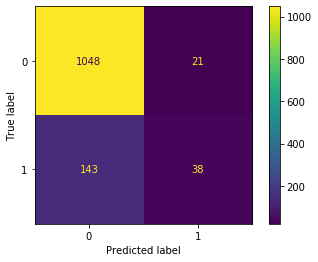

In [15]:
plot_confusion_matrix(model, X_test, y_test)

In [16]:
#model = LogisticRegression(max_iter=10000, class_weight='balanced')
model = LogisticRegression(max_iter=10000, class_weight={'0':0.3, '1':0.7})

In [17]:
model.fit(X_train, y_train)
print( classification_report(y_test, model.predict(X_test) ) )

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1069
           1       0.47      0.40      0.43       181

    accuracy                           0.85      1250
   macro avg       0.68      0.66      0.67      1250
weighted avg       0.84      0.85      0.84      1250



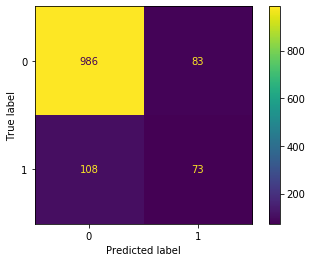

In [18]:
plot_confusion_matrix(model, X_test, y_test)

In [21]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

p_test = tree.predict(X_test)

In [24]:
print( classification_report( y_test, p_test ) )

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1069
           1       0.70      0.77      0.74       181

    accuracy                           0.92      1250
   macro avg       0.83      0.86      0.84      1250
weighted avg       0.92      0.92      0.92      1250



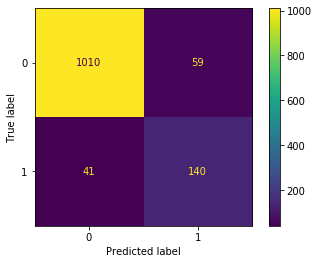

In [25]:
plot_confusion_matrix( tree, X_test, y_test )